# Fashion MNIST

## 1. Dataset

In [4]:
! mkdir ~/.kaggle
! cp drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
# Descargamos
! kaggle datasets download zalando-research/fashionmnist

 71% 49.0M/68.8M [00:00<00:00, 67.7MB/s]
100% 68.8M/68.8M [00:00<00:00, 92.6MB/s]


In [6]:
! unzip fashionmnist.zip
! rm fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


### Forma 1

In [7]:
import pandas as pd
dataset = pd.read_csv('/content/fashion-mnist_train.csv')

In [8]:
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = dataset.values[:,1:]
Y = dataset.label.values

In [10]:
X.shape, Y.shape

((60000, 784), (60000,))

In [11]:
X = X.reshape((-1,28,28))

In [12]:
X.shape

(60000, 28, 28)

### Forma 2

In [36]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [20]:
X, Y = x_train, y_train
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [22]:
# Separamos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.85)

In [23]:
# Normalizamos
x_train, x_valid = x_train/255.0, x_valid/255.0

In [24]:
x_train.shape, y_train.shape

((51000, 28, 28), (51000,))

## 2. Modelo

In [25]:
from keras import Sequential, layers
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


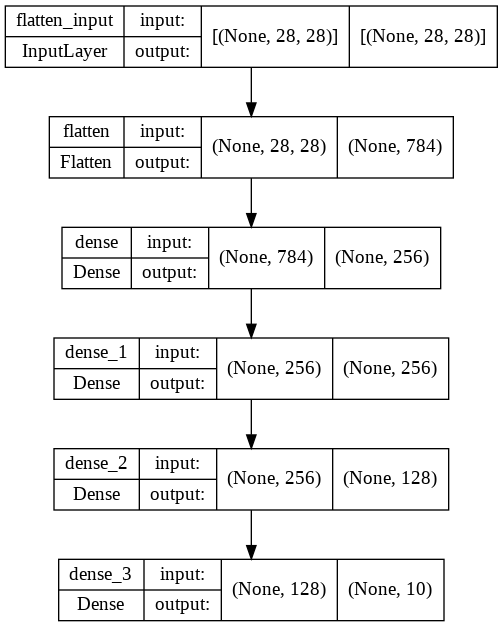

In [28]:
# Grafico
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [31]:
# Compilamos el modelo
model.compile('rmsprop','sparse_categorical_crossentropy',['acc'])

## 3. Entrenamiento

In [32]:
history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_valid,y_valid))

Epoch 1/25
399/399 [==============================] - 5s 9ms/step - loss: 0.5790 - acc: 0.7852 - val_loss: 0.5244 - val_acc: 0.8036
Epoch 2/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3951 - acc: 0.8551 - val_loss: 0.4376 - val_acc: 0.8389
Epoch 3/25
399/399 [==============================] - 3s 8ms/step - loss: 0.3448 - acc: 0.8732 - val_loss: 0.4377 - val_acc: 0.8388
Epoch 4/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3201 - acc: 0.8806 - val_loss: 0.4898 - val_acc: 0.8172
Epoch 5/25
399/399 [==============================] - 3s 9ms/step - loss: 0.2989 - acc: 0.8883 - val_loss: 0.3544 - val_acc: 0.8758
Epoch 6/25
399/399 [==============================] - 4s 11ms/step - loss: 0.2822 - acc: 0.8939 - val_loss: 0.3910 - val_acc: 0.8682
Epoch 7/25
399/399 [==============================] - 3s 9ms/step - loss: 0.2687 - acc: 0.8992 - val_loss: 0.3438 - val_acc: 0.8813
Epoch 8/25
399/399 [==============================] - 3s 8ms/step - loss: 0

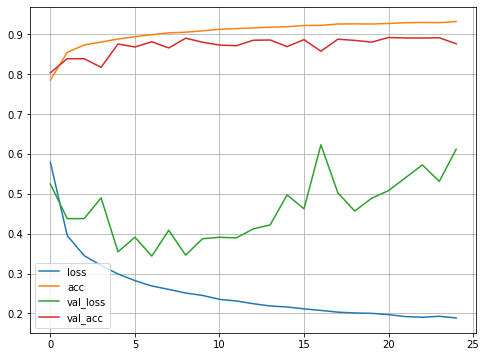

In [35]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 145.7778 - acc: 0.8587


[145.77784729003906, 0.8586999773979187]

## 4. Haciendo predicciones

In [38]:
clases = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']

In [45]:
x = x_test[:3]
y_prob = model.predict(x)
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
import numpy as np
y_index = np.argmax(y_prob,1)
y_index

array([9, 2, 1])

In [49]:
y = np.array(clases)[y_index]
y

array(['Ankle', 'Pullover', 'Trouser'], dtype='<U11')

## 5. Exportar modelo Keras

In [50]:
# Exportamos el modelo
model.save('model1.h5')

In [51]:
# Importar el modelo
from keras.models import load_model
model2 = load_model('model1.h5')

In [52]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [53]:
x = x_test[:3]
y_prob = model2.predict(x)
y_index = np.argmax(y_prob,1)
y = np.array(clases)[y_index]
y

array(['Ankle', 'Pullover', 'Trouser'], dtype='<U11')